In [17]:
import pandas as pd

# -------------------------------
# Step 1: Load the dataset
# -------------------------------
# Replace 'COVID-19.csv' with your actual file path if needed
df = pd.read_csv('/kaggle/input/covid-19/covid.csv')

# Optional: Clean column names (remove leading/trailing spaces)
df.columns = df.columns.str.strip()

# -------------------------------
# Step 2: Create new ratio columns
# -------------------------------

# Calculate Active Ratio (%)
df['Active Ratio'] = (df['Active'] / df['Total Cases']) * 100

# Calculate Discharge Ratio (%)
df['Discharge Ratio'] = (df['Discharged'] / df['Total Cases']) * 100

# Calculate Death Ratio (%)
df['Death Ratio'] = (df['Deaths'] / df['Total Cases']) * 100

# Calculate Cases per Million
df['Cases per Million'] = df['Total Cases'] / df['Population (millions)']

# -------------------------------
# Step 3: Display the result
# -------------------------------
print(df.head())  # View first 5 rows to verify

     State/UTs  Total Cases  Active  Discharged  Deaths  \
0  Maharashtra      1250000   15000     1220000   25000   
1       Kerala       950000   10000      935000    5000   
2   Tamil Nadu       850000    8000      838000    4000   
3        Delhi       700000    5000      692000    3000   
4    Karnataka       600000    7000      588000    5000   

   Population (millions)  Active Ratio  Discharge Ratio  Death Ratio  \
0                    123      1.200000        97.600000     2.000000   
1                     35      1.052632        98.421053     0.526316   
2                     76      0.941176        98.588235     0.470588   
3                     20      0.714286        98.857143     0.428571   
4                     68      1.166667        98.000000     0.833333   

   Cases per Million  
0       10162.601626  
1       27142.857143  
2       11184.210526  
3       35000.000000  
4        8823.529412  


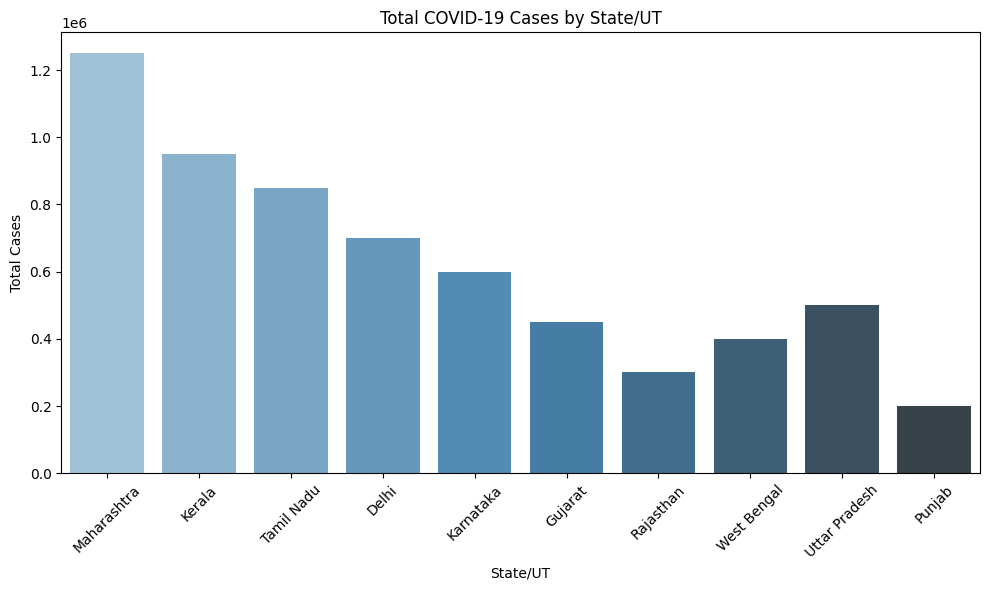

In [13]:
plt.figure(figsize=(10, 6))
sns.barplot(x='State/UTs', y='Total Cases', data=df, palette='Blues_d')
plt.title('Total COVID-19 Cases by State/UT')
plt.xlabel('State/UT')
plt.ylabel('Total Cases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

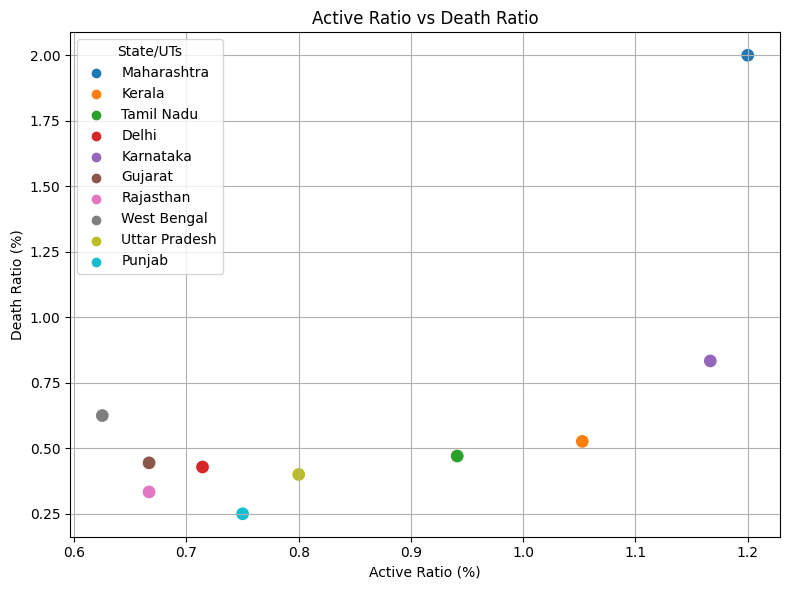

In [14]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Active Ratio', y='Death Ratio', hue='State/UTs', s=100)
plt.title('Active Ratio vs Death Ratio')
plt.xlabel('Active Ratio (%)')
plt.ylabel('Death Ratio (%)')
plt.grid(True)
plt.tight_layout()
plt.show()

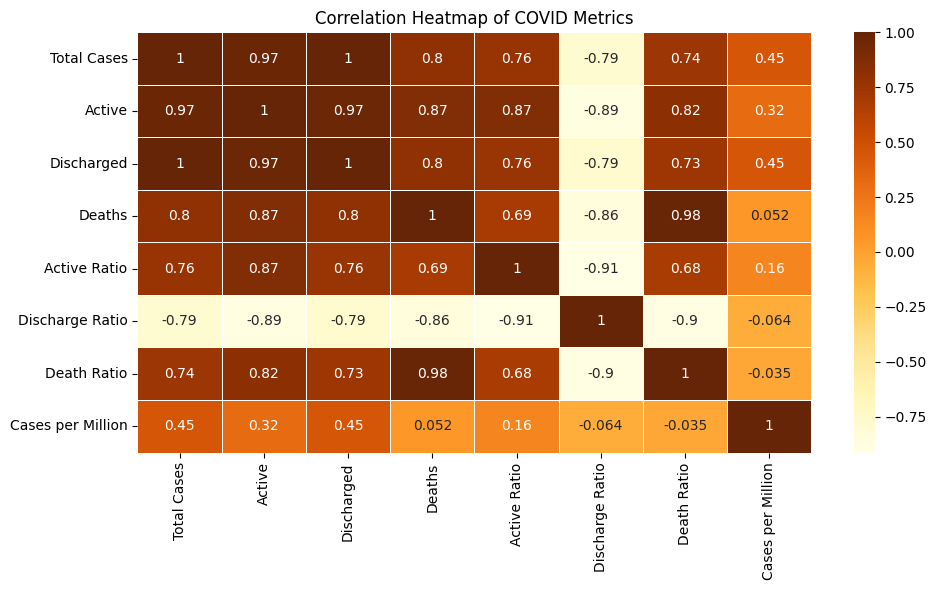

In [18]:
plt.figure(figsize=(10, 6))
corr = df[['Total Cases', 'Active', 'Discharged', 'Deaths',
           'Active Ratio', 'Discharge Ratio', 'Death Ratio', 'Cases per Million']].corr()
sns.heatmap(corr, annot=True, cmap='YlOrBr', linewidths=0.5)
plt.title('Correlation Heatmap of COVID Metrics')
plt.tight_layout()
plt.show()

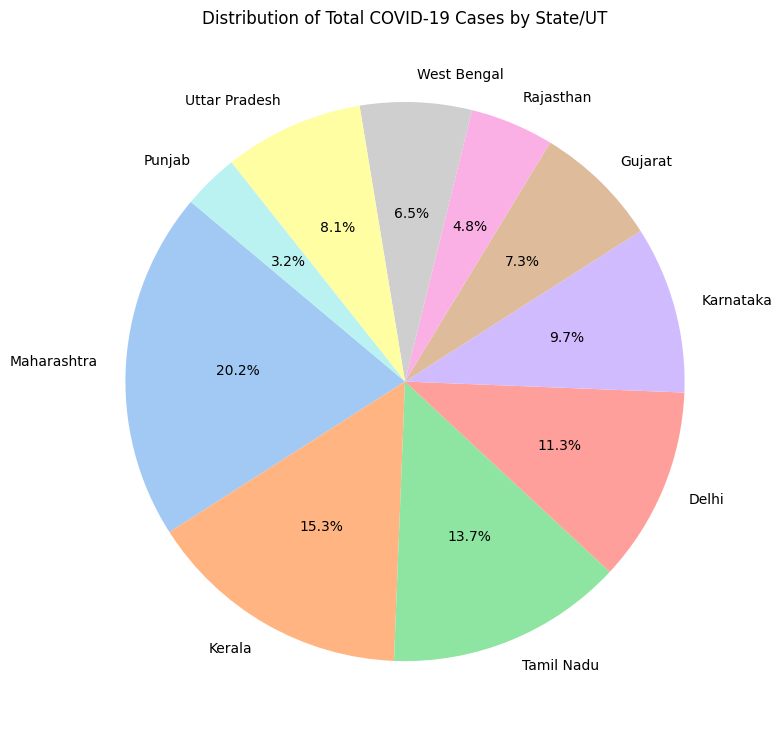

In [20]:
plt.figure(figsize=(8, 8))
plt.pie(df['Total Cases'], labels=df['State/UTs'], autopct='%1.1f%%', startangle=140, 
        colors=sns.color_palette('pastel'))
plt.title('Distribution of Total COVID-19 Cases by State/UT')
plt.tight_layout()
plt.show()

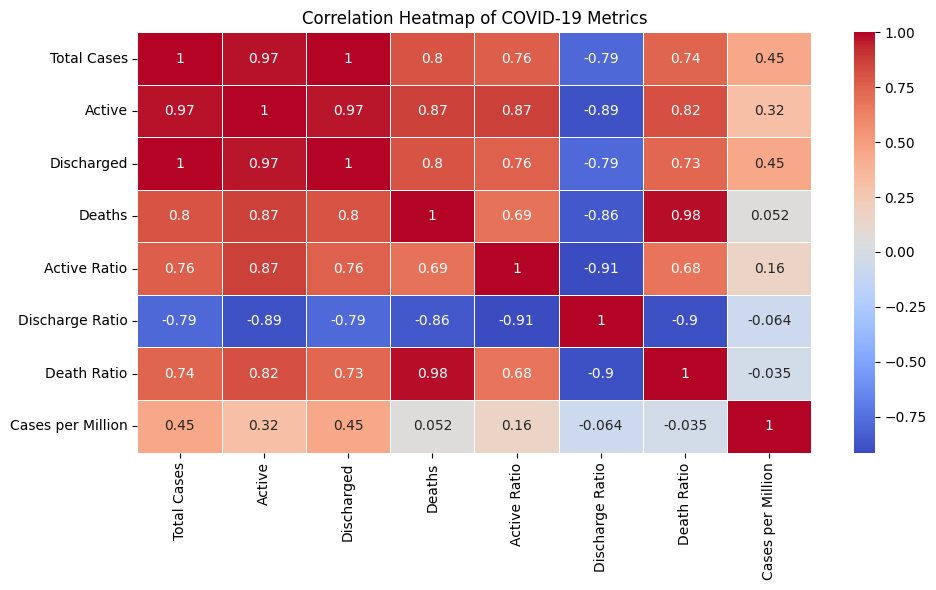

In [21]:
correlation_matrix = df[['Total Cases', 'Active', 'Discharged', 'Deaths',
                         'Active Ratio', 'Discharge Ratio', 'Death Ratio', 'Cases per Million']].corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of COVID-19 Metrics')
plt.tight_layout()
plt.show()

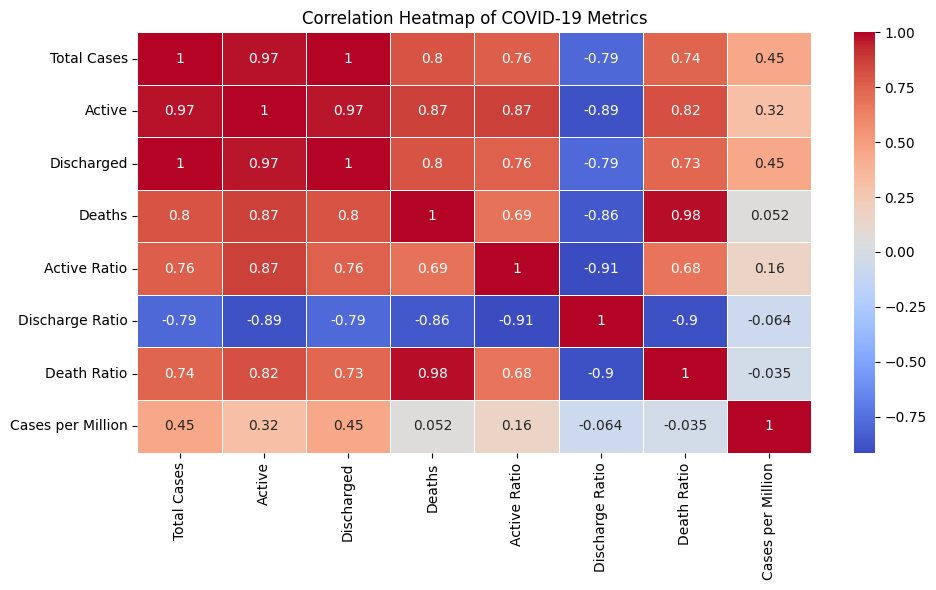

In [22]:
correlation_matrix = df[['Total Cases', 'Active', 'Discharged', 'Deaths',
                         'Active Ratio', 'Discharge Ratio', 'Death Ratio', 'Cases per Million']].corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of COVID-19 Metrics')
plt.tight_layout()
plt.show()

In [23]:
q1 = df.loc[df['Active Ratio'].idxmax(), ['State/UTs', 'Active Ratio']]
print("Q1. State with highest Active Ratio:\n", q1, "\n")

# Q2. Top 3 states with highest cases per million
q2 = df[['State/UTs', 'Cases per Million']].sort_values(by='Cases per Million', ascending=False).head(3)
print("Q2. Top 3 states with highest cases per million:\n", q2, "\n")

# Q3. States with death ratio > 1.5%
q3 = df[df['Death Ratio'] > 1.5][['State/UTs', 'Death Ratio']]
print("Q3. States with Death Ratio > 1.5%:\n", q3, "\n")

# Q4. States with total cases > 500,000 and < 1,000,000
q4 = df[(df['Total Cases'] > 500000) & (df['Total Cases'] < 1000000)][['State/UTs', 'Total Cases']]
print("Q4. States with Total Cases between 500,000 and 1,000,000:\n", q4, "\n")

# Q5. What’s the average discharge ratio?
q5 = df['Discharge Ratio'].mean()
print(f"Q5. Average Discharge Ratio: {q5:.2f}%")

Q1. State with highest Active Ratio:
 State/UTs       Maharashtra
Active Ratio            1.2
Name: 0, dtype: object 

Q2. Top 3 states with highest cases per million:
     State/UTs  Cases per Million
3       Delhi       35000.000000
1      Kerala       27142.857143
2  Tamil Nadu       11184.210526 

Q3. States with Death Ratio > 1.5%:
      State/UTs  Death Ratio
0  Maharashtra          2.0 

Q4. States with Total Cases between 500,000 and 1,000,000:
     State/UTs  Total Cases
1      Kerala       950000
2  Tamil Nadu       850000
3       Delhi       700000
4   Karnataka       600000 

Q5. Average Discharge Ratio: 98.59%
